# **Credit Risk Prediction Using Machine Learning Models: A Comparison Study**

##Problem Statement

In financial sectos, it is critical to maintain economic stability and customer relationships by accurately predicting credit default risk. This project aims to employ machine learning techniques, analyzing historical transaction and demographic data provided by American Express, to identify how different factors contribute to credit card default risk.  

Our analysis will make comparison the efficacy of various machine learning algorithms - logistic regression, random forests, decision trees, XG Boost, and gradient Boosting - in predicting the likelihood of a customer defaulting on a credit card payment. Through comparative study, we will be able to determine which model presents best accuracy, efficiency as well as interpretability of credit risk assessment. Under predictions of the study, actionable insights will allow financial institutions to develop risk mitigation strategies and enhance decision-making process related to credit issuance.

##Targeted Stakeholders

This project focuses on predicting the likelihood of credit card defaults, an issue of paramount importance that impacts a diverse array of stakeholders, including banks, financial institutions, credit rating agencies, and the credit card holders themselves. Here's a detailed explanation of who cares about this problem and why it's so crucial to them:

* Banks and Financial Institutions: These entities are the
most direct beneficiaries as they provide credit card services. Accurate predictions of credit card defaults allow them to mitigate risks, optimize credit decisions, reduce bad debt losses, and enhance overall financial health. Understanding the factors that lead to customer defaults is crucial for them to make more informed decisions while approving credit card applications.

* Credit Rating Agencies: Responsible for assessing the credit risk of individuals or businesses, these agencies can use the findings of the project to improve their scoring models for a more accurate assessment of credit risks.

* Policy Makers and Regulatory Bodies: Understanding the dynamics of credit card defaults can aid policy makers in formulating more effective financial regulatory policies, ensuring the stability of the financial system.

* Credit Card Holders: While they are not directly involved in the use of the model, transparent and fair credit assessments are beneficial for them. It helps to protect them from potential credit discrimination and ensures that they receive appropriate credit limits.

* Financial Service Innovators: For companies and entrepreneurs seeking innovative solutions in the fintech space, understanding patterns of credit card defaults is vital. It can inspire new products and services, such as special credit products designed for high-risk customers.

In summary, this project is not only crucial for the day-to-day operations of the financial industry but also for maintaining the health and stability of the entire financial system. By improving the prediction of defaults, we can anticipate a more robust and equitable credit environment.

##Data source explanation

The primary data sources is CSV file belonging to American
Express: train.csv from [Kaggle](https://www.kaggle.com/datasets/pradip11/amexpert-codelab-2021?select=test.csv). We plan to use train dataset only as it contains sufficient rows. We plan to split the train dataset into another train and test dataset to see the relationship and prediction accuracy, evaluating the performance of the predictive model.

##Dataset Description

As we only employ the train dataset, there are 45528 entries in total. Meanwhile, except the dependent variable(credit_card_default), there are 18 potential factors affecting the possibility of credit default. The types of variables include demographic information (e.g., age, gender), financial metrics (e.g., net_yearly_income, yearly_debt_payments), credit history (e.g., credit_score), and other relevant information.


###Data Dictionary


| Column | Type | Description |
|----------|----------|----------|
|  customer id | text | Unique identifier for each customer
| name | text | Full name of the customer
| age | number | Age of the customer in years
| gender | text | Gender of the customer
| owns_car | text | Whether the customer owns a car (Y for yes, N for no)
| owns_house | text | Whether the customer owns a house (Y for yes, N for no)
| no_of_children | number | Number of children the customer has
| net_yearly_income | number | Net yearly income of the customer
| no_of_days_employed | number | Number of days the customer has been employed
| occupation_type | text | Type of occupation of the customer
| total_family_members | number | Total number of family members
| migrant_worker | number | Whether the customer is a migrant worker (1 for yes, 0 for no)
| yearly_debt_payments | number | Yearly debt payments of the customer
| credit_limit | number | Credit limit of the customer
| credit_limit_used(%) | number| Percentage of credit limit used by the customer
| credit_score | number | Credit score of the customer
| prev_defaults | number | Number of previous defaults by the customer
| default_in_last_6months | number | Whether the customer defaulted in the last 6 months (1 for yes, 0 for no)
| credit_card_default | number | Whether the customer has defaulted on a credit card (1 for yes, 0 for no)

# Import Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data = '/content/drive/MyDrive/BA810_Group_Project/train.csv'
# data = '/content/drive/My Drive/train.csv'
data = pd.read_csv(data)

print(data.head())
print(data.dtypes)

Mounted at /content/drive
  customer_id            name  age gender owns_car owns_house  no_of_children  \
0  CST_115179        ita Bose   46      F        N          Y             0.0   
1  CST_121920  Alper Jonathan   29      M        N          Y             0.0   
2  CST_109330     Umesh Desai   37      M        N          Y             0.0   
3  CST_128288             Rie   39      F        N          Y             0.0   
4  CST_151355          McCool   46      M        Y          Y             0.0   

   net_yearly_income  no_of_days_employed occupation_type  \
0          107934.04                612.0         Unknown   
1          109862.62               2771.0        Laborers   
2          230153.17                204.0        Laborers   
3          122325.82              11941.0      Core staff   
4          387286.00               1459.0      Core staff   

   total_family_members  migrant_worker  yearly_debt_payments  credit_limit  \
0                   1.0             1.0  

# Data Cleaning

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['occupation_type'] = label_encoder.fit_transform(data['occupation_type'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

print(data.head())
print(data.describe())
print(data.info())

  customer_id            name  age gender owns_car owns_house  no_of_children  \
0  CST_115179        ita Bose   46      F        N          Y             0.0   
1  CST_121920  Alper Jonathan   29      M        N          Y             0.0   
2  CST_109330     Umesh Desai   37      M        N          Y             0.0   
3  CST_128288             Rie   39      F        N          Y             0.0   
4  CST_151355          McCool   46      M        Y          Y             0.0   

   net_yearly_income  no_of_days_employed  occupation_type  \
0          107934.04                612.0               17   
1          109862.62               2771.0                8   
2          230153.17                204.0                8   
3          122325.82              11941.0                3   
4          387286.00               1459.0                3   

   total_family_members  migrant_worker  yearly_debt_payments  credit_limit  \
0                   1.0             1.0              33070.28

In [ ]:
null_values = data.isnull().sum()
print(null_values)

null_percentage = (data.isnull().sum() / len(data)) * 100
print(null_percentage)

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64
customer_id                0.000000
name                       0.000000
age                        0.000000
gender                     0.000000
owns_car                   1.201458
owns_house                 0.000000
no_of_children             1.700053
net_yearly_income          0.000000
no_of_days_employed        1.016957
occupation_type            0.000000
total_family_members       0.182305
mi

In [ ]:
data = data.dropna()
data = data[data['gender'] != 'XNA']

gender_mapping = {'F': 0, 'M': 1}
binary_mapping = {'N': 0, 'Y': 1}
data.loc[:, 'gender'] = data['gender'].map(gender_mapping)
data.loc[:, 'owns_car'] = data['owns_car'].map(binary_mapping)
data.loc[:, 'owns_house'] = data['owns_house'].map(binary_mapping)

print(data.head())
print(data.info)

  customer_id            name  age  gender  owns_car  owns_house  \
0  CST_115179        ita Bose   46       0         0           1   
1  CST_121920  Alper Jonathan   29       1         0           1   
2  CST_109330     Umesh Desai   37       1         0           1   
3  CST_128288             Rie   39       0         0           1   
4  CST_151355          McCool   46       1         1           1   

   no_of_children  net_yearly_income  no_of_days_employed  occupation_type  \
0             0.0          107934.04                612.0               17   
1             0.0          109862.62               2771.0                8   
2             0.0          230153.17                204.0                8   
3             0.0          122325.82              11941.0                3   
4             0.0          387286.00               1459.0                3   

   total_family_members  migrant_worker  yearly_debt_payments  credit_limit  \
0                   1.0             1.0    

<ipython-input-92-4e25fa73091e>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'gender'] = data['gender'].map(gender_mapping)
<ipython-input-92-4e25fa73091e>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'owns_car'] = data['owns_car'].map(binary_mapping)
<ipython-input-92-4e25fa73091e>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if column

##EDA

In [ ]:
print(data.describe())

                age        gender      owns_car    owns_house  no_of_children  \
count  43508.000000  43508.000000  43508.000000  43508.000000    43508.000000   
mean      38.997587      0.341983      0.339041      0.695366        0.420911   
std        9.543386      0.474379      0.473389      0.460257        0.724595   
min       23.000000      0.000000      0.000000      0.000000        0.000000   
25%       31.000000      0.000000      0.000000      0.000000        0.000000   
50%       39.000000      0.000000      0.000000      1.000000        0.000000   
75%       47.000000      1.000000      1.000000      1.000000        1.000000   
max       55.000000      1.000000      1.000000      1.000000        9.000000   

       net_yearly_income  no_of_days_employed  occupation_type  \
count       4.350800e+04         43508.000000     43508.000000   
mean        2.008967e+05         67632.818401        10.735566   
std         6.840601e+05        139342.813710         5.604876   
min   

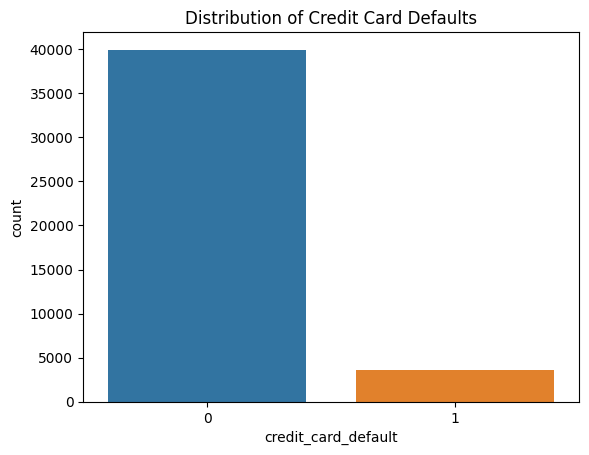

In [ ]:
sns.countplot(x='credit_card_default', data=data)
plt.title('Distribution of Credit Card Defaults')
plt.show()

The graph illustrates a significant imbalance in the dataset between customers who have not defaulted (0) and those who have (1). The majority of customers in this dataset have not experienced a default, as indicated by the towering bar for non-defaults.

<ipython-input-95-245cb4083302>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".2f")


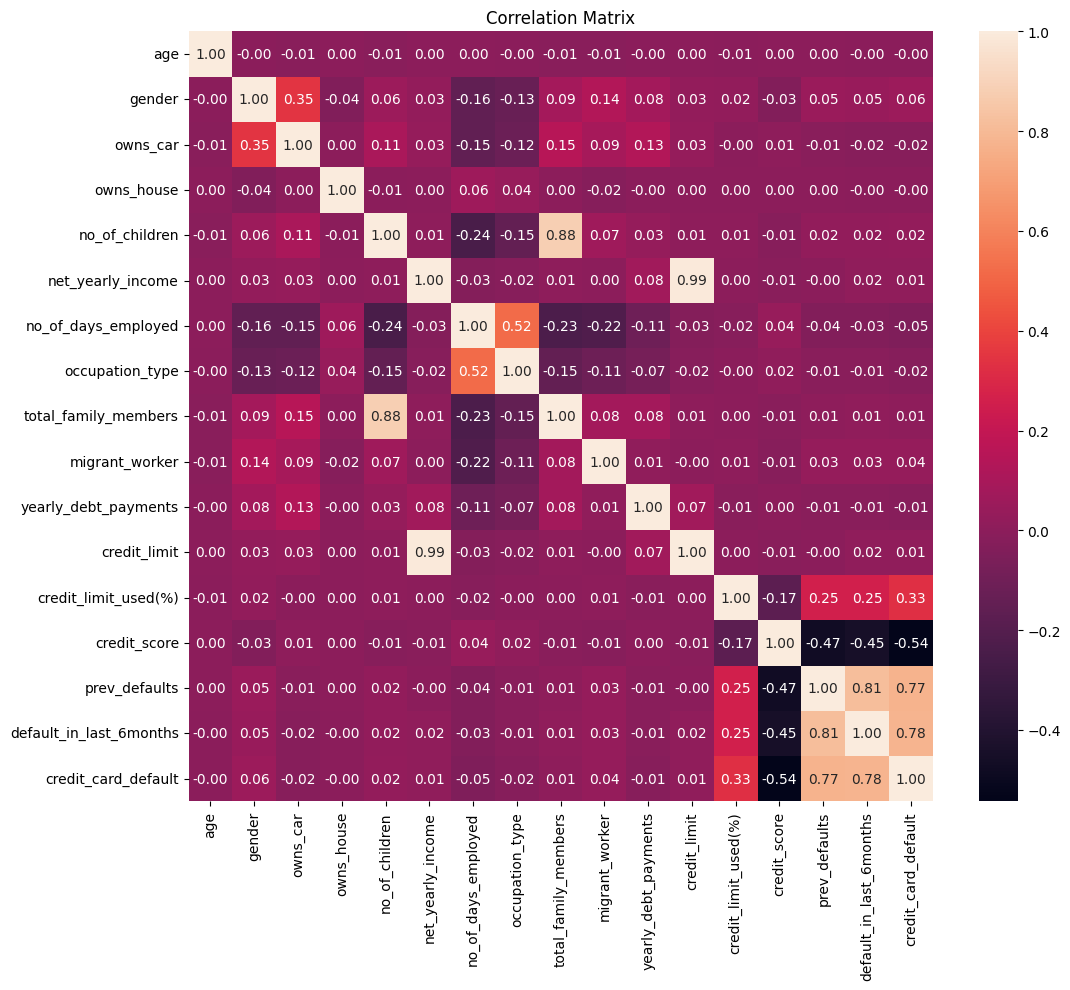

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Key insights of this graph include strong positive correlations between past defaults ('prev_defaults', 'default_in_last_6months') and the target variable 'credit_card_default', suggesting a historical pattern of defaulting is indicative of future risks. A strong negative correlation between 'credit_score' and 'credit_card_default' indicates that lower credit scores are associated with higher default risks.

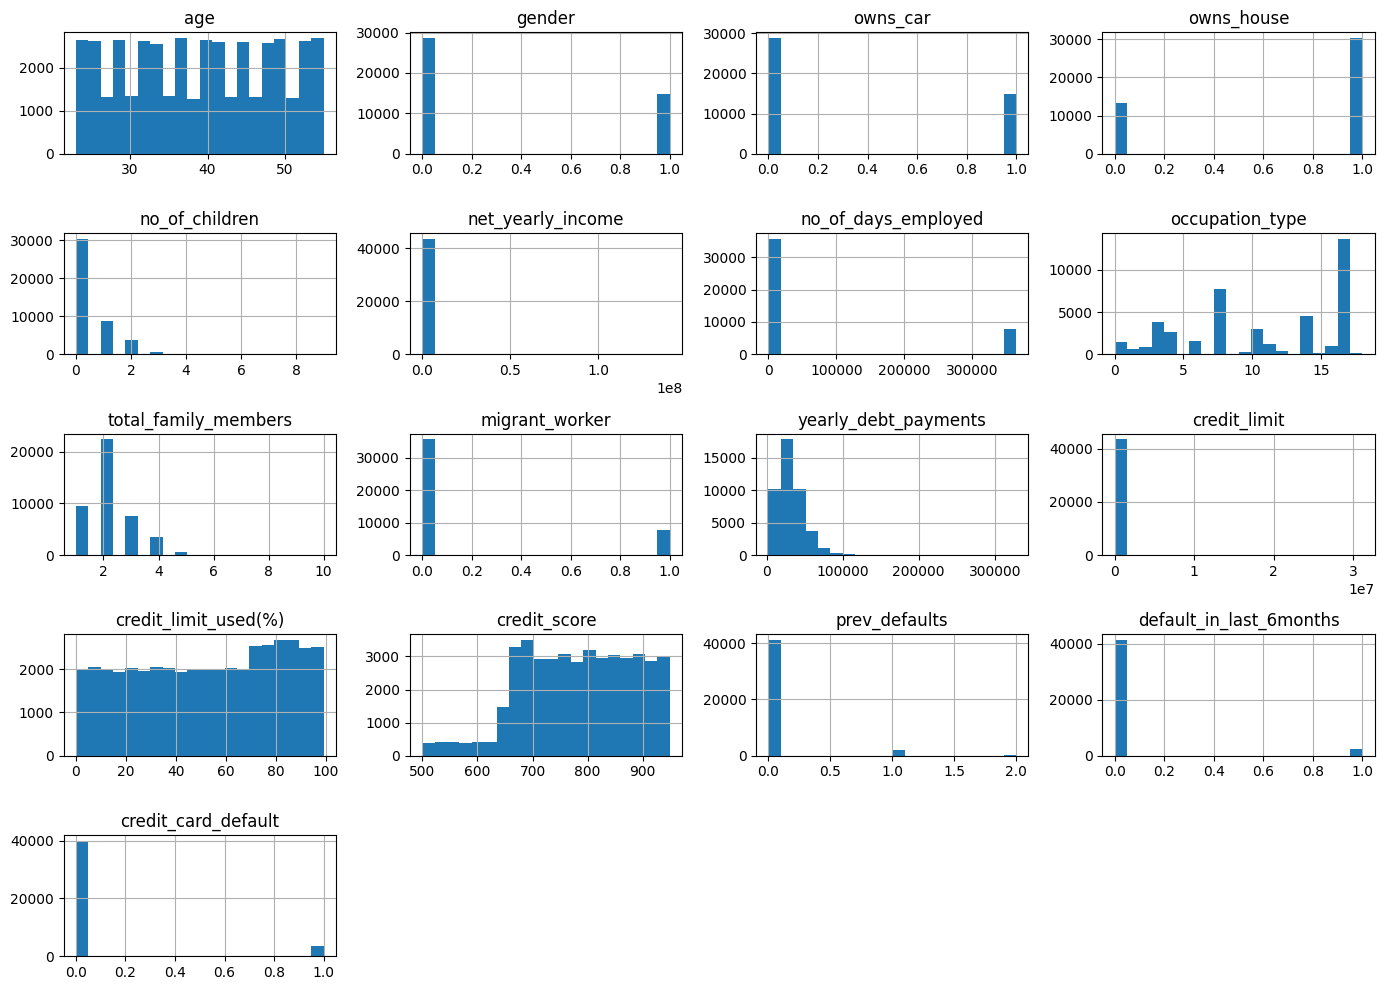

In [ ]:
data.hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()

The histograms provided present a comprehensive representation of the diverse customer attributes contained in the dataset. The age histogram exhibits a relatively uniform distribution, suggesting that the clientele comprises a wide variety with respect to age. Gender may signify a balanced representation of two groups, potentially male and female, due to its apparent dichotomy. Additionally, car and house ownership are dichotomous, with a considerably greater proportion of clients owning houses as opposed to cars. The distribution of total family members and the number of children is skewed to the right, indicating that the majority of customers have small families. The majority of clients' income and days worked are also right-skewed, with values near the bottom of the distribution. This may have an impact on their creditworthiness. The variety of occupations reflects the customers' diverse economic backgrounds. The credit risk may be influenced by the wide distribution of the credit limit utilized percentage. Credit scores are typically skewed toward higher values, which signifies that the majority of customers exhibit favorable credit behavior. A critical metric for predictive analysis, previous defaults and defaults within the last six months indicate that the majority of customers have not experienced any defaults. In their entirety, these histograms furnish a momentary depiction of the demographic and financial variables that may impact credit risk and contribute to the comprehension of the customer profiles contained within the dataset.

#Pipeline

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

X = data.drop(['customer_id','name','credit_card_default'], axis=1)
y = data['credit_card_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_exclude=np.number))
], verbose_feature_names_out=False)

imbalance_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampling', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

imbalance_pipeline.fit(X_train, y_train)

predictions = imbalance_pipeline.predict(X_test)

imbalance_pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f46ef9e7ee0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f46eefa85b0>)],
                                   verbose_feature_names_out=False)),
                ('sampling', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

# Feature Selection

## Logistics Regression Classifier

Optimal number of features: 5
Selected features: Index(['no_of_days_employed', 'credit_limit_used(%)', 'credit_score',
       'prev_defaults', 'default_in_last_6months'],
      dtype='object')
RMSE at optimal number of features: -0.9798310206233352


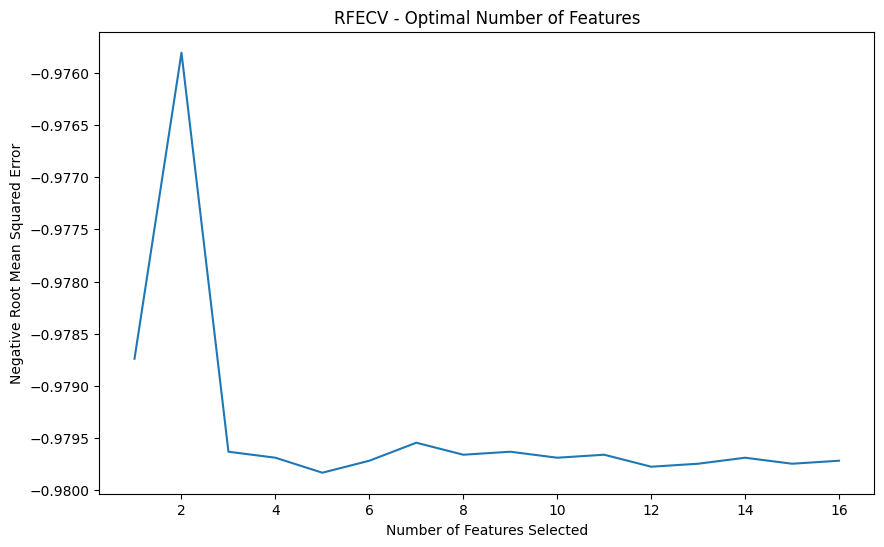

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

logistic_regression_estimator = LogisticRegression()

rfecv = RFECV(estimator=logistic_regression_estimator, scoring='accuracy')

rfecv_pipe = Pipeline([
    ('prep', preprocessor),
    ('select', rfecv),
    ('model', LogisticRegression())
])

rfecv_pipe.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plt.title("RFECV - Optimal Number of Features")
plt.xlabel("Number of Features Selected")
plt.ylabel("Negative Root Mean Squared Error")
mean_score = -rfecv.cv_results_['mean_test_score']
plt.plot(range(1, len(mean_score) + 1), mean_score)

optimal_num_features = rfecv.n_features_
optimal_rmse = -rfecv.cv_results_['mean_test_score'][optimal_num_features - 1]
print(f"Optimal number of features: {optimal_num_features}")
print(f"Selected features: {X_train.columns[rfecv.support_]}")
print(f"RMSE at optimal number of features: {optimal_rmse}")


## Random Forest Classifier




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X = data.drop('credit_card_default', axis=1)
y = data['credit_card_default']

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf_pipeline = Pipeline([
    ('prep', preprocessor),
    ('rf', rf)
])

rf_pipeline.fit(X_train, y_train)

feature_importances = rf_pipeline.named_steps['rf'].feature_importances_

feature_names = np.array(numerical_cols.tolist() +
                         preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist())

sorted_indices = np.argsort(feature_importances)[::-1]

selected_features = feature_names[sorted_indices][:5]
feature_importances = feature_importances[sorted_indices][:5]

print("Top 5 Features:")
for feature, importance in zip(selected_features, feature_importances):
    print(f"{feature}: {importance}")

Top 5 Features:
credit_score: 0.23436362939020156
prev_defaults: 0.20427464822694144
default_in_last_6months: 0.178812247785879
credit_limit_used(%): 0.04905740629136975
no_of_days_employed: 0.010086578741683278


# Machine Learning Model

##Reason Behind Model Selection

We plan to exclude a few methods mentioning in class, including Linear Regression, Support Vector Machines, and Bayesian method.
For Linear Regression, we believe credit risk assessment involve complex and non-linear relationships between factors, which means such method may not be able to capture complexities appropriately. Meanwhile, default risk is considered as binary outcomes, since linear regression is used for continuous outcomes, it will not outperform in binary classification.

When it comes to SVM, we suggest it is less efficient and time-consuming since our dataset from American Express is relatively large, and SVM becomes computationally intensive with large datasets. Additionally, it is quite difficult to interpret for SVM method, making it hard for stakeholders to understand during the decision-making process.

Besides, Bayesian method is computationally demanding, which is a limitation for such large dataset. Meanwhile, variables are required to be independent from each other, therefore, it is not practical for us to employ this method. Scaling Bayesian methods to the dataset is challenging for real-life applications as well.

## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from scipy.stats import loguniform
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.metrics import accuracy_score


X = data[['no_of_days_employed', 'credit_limit_used(%)', 'credit_score', 'prev_defaults', 'default_in_last_6months']]
y = data['credit_card_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

param_distribs = {
    'classifier__C': loguniform(1e-4, 1e4),
    'classifier__penalty': ['l1', 'l2']
}

logistic_pipeline.set_params(classifier__solver='liblinear')

halving_random_search_lg = HalvingRandomSearchCV(logistic_pipeline, param_distribs,
                                              n_candidates=25, cv=3,
                                              min_resources='exhaust',
                                              scoring='balanced_accuracy',
                                              random_state=42)

halving_random_search_lg.fit(X_train, y_train)

print("Best Parameters:", halving_random_search_lg.best_params_)
print("Best Estimator:", halving_random_search_lg.best_estimator_)

best_model = halving_random_search_lg.best_estimator_

y_pred = best_model.predict(X_test)

recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

test_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'Accuracy of the best found model on the test data is {test_balanced_accuracy:.6f}')
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Best Parameters: {'classifier__C': 6.155564318973028, 'classifier__penalty': 'l1'}
Best Estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=6.155564318973028, penalty='l1',
                                    random_state=42, solver='liblinear'))])
Accuracy of the best found model on the test data is 0.884826
Recall: 0.7727
F1 Score: 0.8561
Precision: 0.9597
Test Accuracy: 0.9779


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, balanced_accuracy_score

cv = StratifiedKFold(n_splits=5)
scorer = make_scorer(balanced_accuracy_score)
logistic_scores = cross_val_score(halving_random_search_lg.best_estimator_, X, y, cv=cv, scoring=scorer)
print(f"Average balanced accuracy for Logistic Regression model: {np.mean(logistic_scores):.4f} (+/- {np.std(logistic_scores):.4f})")

Average balanced accuracy for Logistic Regression model: 0.8886 (+/- 0.0067)


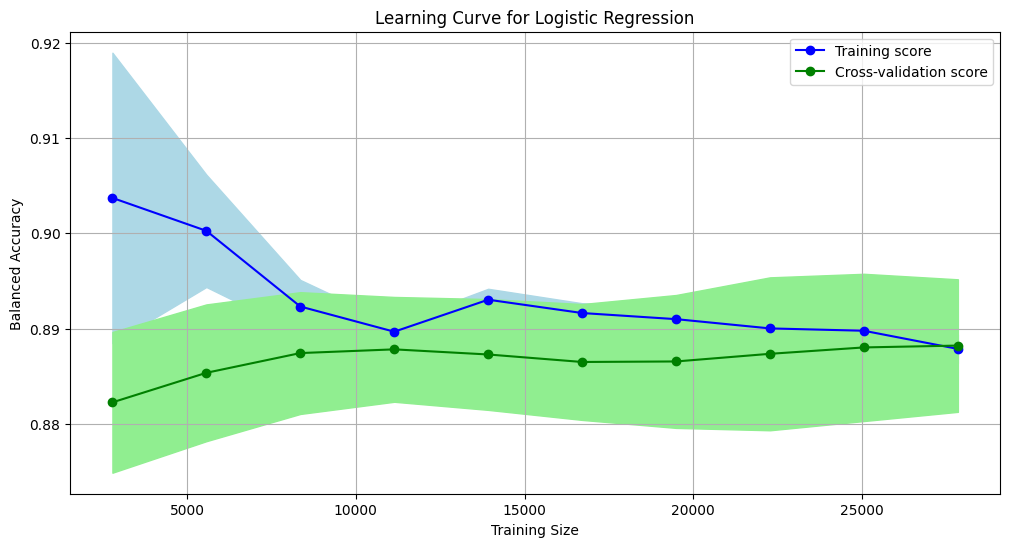

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

logistic_regression_estimator = LogisticRegression(random_state=42)

pipeline = Pipeline(steps=[
    ('prep', preprocessor),
    ('model', logistic_regression_estimator)
])

train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='balanced_accuracy', n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lightblue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='lightgreen')

plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Size')
plt.ylabel('Balanced Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
# overfitting test for logistic regression
from sklearn.metrics import balanced_accuracy_score

y_train_pred = best_model.predict(X_train)

train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)

print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Balanced Accuracy: {train_balanced_accuracy:.4f}")

print("\nTest Metrics:")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Test Balanced Accuracy: {test_balanced_accuracy:.4f}")

if train_balanced_accuracy > test_balanced_accuracy:
    if (train_balanced_accuracy - test_balanced_accuracy) > 0.05:  # Threshold for overfitting
        print("\nThe model might be overfitting.")
    else:
        print("\nThe model seems fine, not significantly overfitting.")
else:
    print("\nThe model is not overfitting. It performs similarly or better on the test set.")

Training Recall: 0.7808
Training F1 Score: 0.8613
Training Precision: 0.9604
Training Balanced Accuracy: 0.8890

Test Metrics:
Recall: 0.7727
F1 Score: 0.8561
Precision: 0.9597
Test Balanced Accuracy: 0.8848

The model seems fine, not significantly overfitting.


## Decision Tree

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn import set_config

set_config(display='diagram')

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
    ])
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_encoder', OneHotEncoder(sparse_output=False))
    ])

prep_pipeline = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include='category'))
], verbose_feature_names_out=False)
prep_pipeline.set_output(transform='pandas')

X_train_prepd = prep_pipeline.fit_transform(X_train)

X_test_prepd = prep_pipeline.transform(X_test)


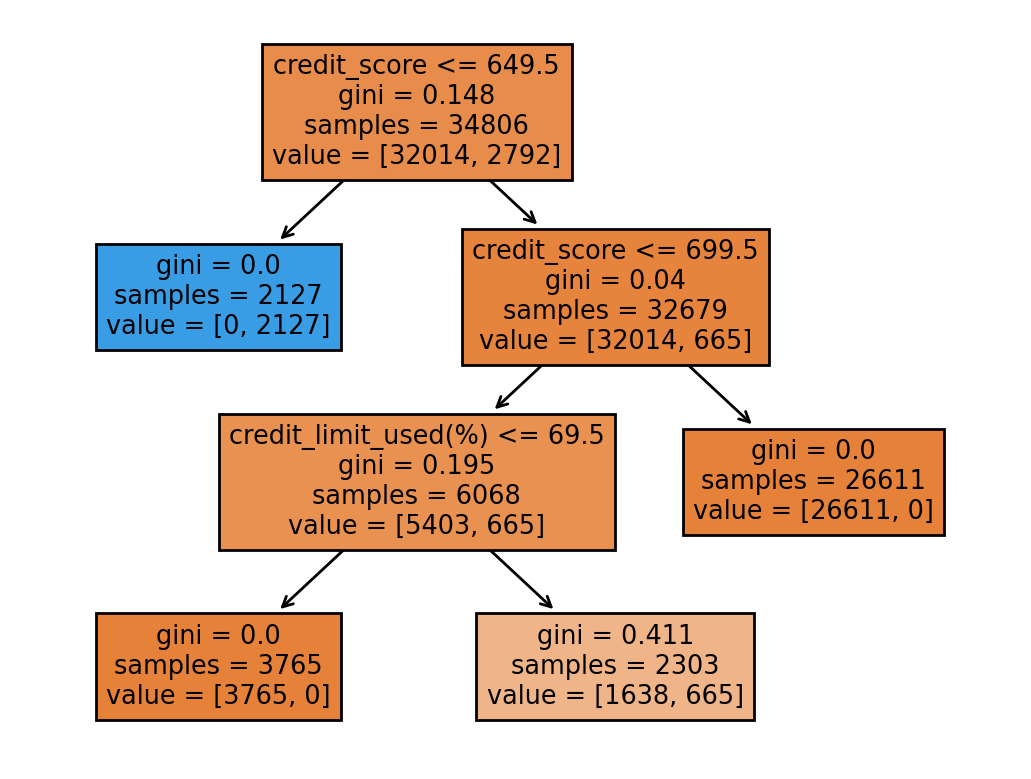

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import make_pipeline

clf = DecisionTreeClassifier(max_depth=3)

clf.fit(X_train_prepd, y_train)

plt.figure(dpi=200)
plot_tree(clf, filled=True, feature_names=list(X_train_prepd.columns));

There are 280 alpha values.


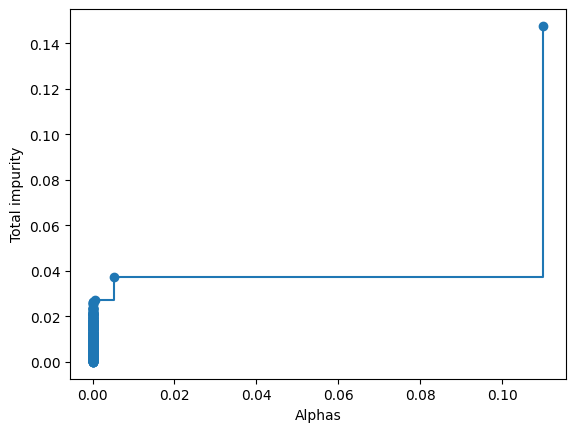

In [ ]:
clf_full = DecisionTreeClassifier()
path = clf_full.cost_complexity_pruning_path(X_train_prepd, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.plot(ccp_alphas, impurities, marker='o', drawstyle='steps-post')
plt.xlabel('Alphas'); plt.ylabel('Total impurity');

print(f'There are {ccp_alphas.shape[0]} alpha values.')

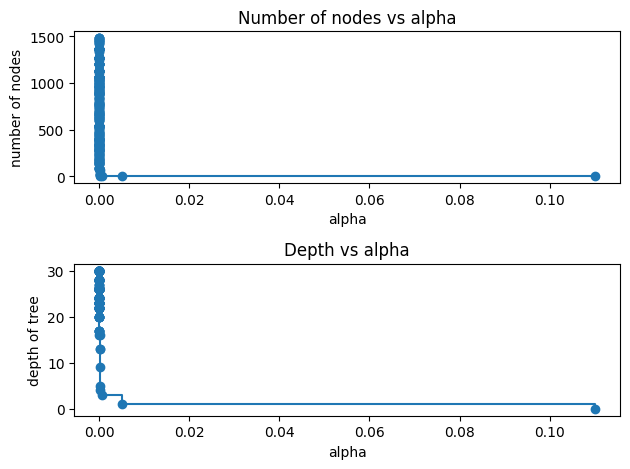

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf_i = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_i.fit(X_train_prepd, y_train)
    clfs.append(clf_i)

node_counts = [clf_i.tree_.node_count for clf_i in clfs]
depth = [clf_i.tree_.max_depth for clf_i in clfs]

fig, ax = plt.subplots(2, 1, dpi=100)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

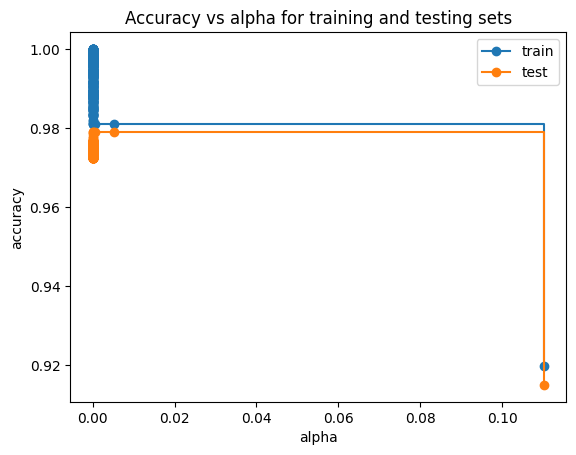

In [ ]:
train_scores = [clf_i.score(X_train_prepd, y_train) for clf_i in clfs]
test_scores = [clf_i.score(X_test_prepd, y_test) for clf_i in clfs]

fig, ax = plt.subplots(dpi=100)
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'ccp_alpha': ccp_alphas}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_prepd, y_train)

grid_cv_res = pd.DataFrame(grid_search.cv_results_)
grid_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
display(grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head())
best_tree = grid_search.best_estimator_
print(f'The total number of nodes is {best_tree.tree_.node_count} and the max depth is {best_tree.tree_.max_depth}.')

best_tree = grid_search.best_estimator_

y_pred = best_tree.predict(X_test_prepd)

from sklearn.metrics import recall_score, f1_score, precision_score

recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")

,param_ccp_alpha,mean_test_score
278,0.005128,0.980894
277,0.000672,0.980894
276,0.000128,0.980894
275,0.000104,0.979946
273,0.000092,0.979659


The total number of nodes is 9 and the max depth is 4.
Recall: 0.7524
F1 Score: 0.8587
Precision: 1.0000


Test accuracy was 97.90%.


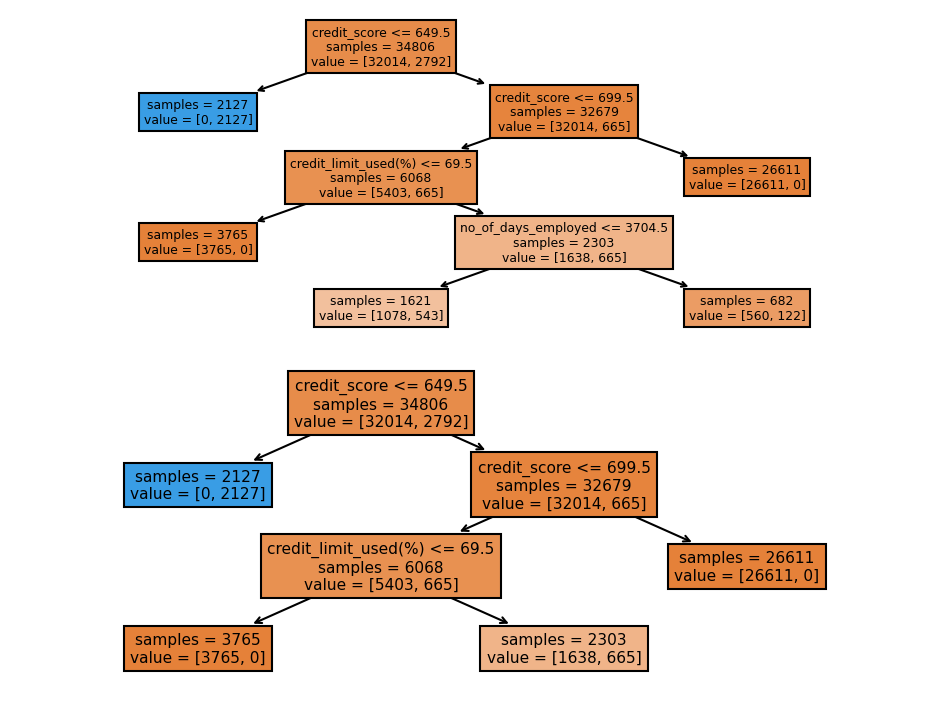

In [ ]:
from sklearn.metrics import accuracy_score

fig, ax = plt.subplots(2, 1, dpi=150)
plot_tree(best_tree, filled=True, feature_names=list(X_train_prepd.columns), impurity=False, ax=ax[0])
plot_tree(clf, filled=True, feature_names=list(X_train_prepd.columns), impurity=False, ax=ax[1])
fig.tight_layout()

print(f'Test accuracy was {accuracy_score(y_test, best_tree.predict(X_test_prepd)):2.2%}.')

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, balanced_accuracy_score

cv = StratifiedKFold(n_splits=5)

scorer = make_scorer(balanced_accuracy_score)
dt_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=cv, scoring=scorer)
print(f"Average balanced accuracy for Decision Tree model: {np.mean(dt_scores):.4f} (+/- {np.std(dt_scores):.4f})")

Average balanced accuracy for Decision Tree model: 0.8800 (+/- 0.0059)


In [ ]:
# overfitting test for decision tree
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, balanced_accuracy_score

y_train_pred = best_tree.predict(X_train_prepd)

train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

print("Training Metrics:")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Balanced Accuracy: {train_balanced_accuracy:.4f}")
print(f"Accuracy: {train_accuracy:.4f}")

print("\nTest Metrics:")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
print(f"Accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy:
    difference = train_accuracy - test_accuracy
    if difference > 0.05:
        print("\nThe model might be overfitting.")
    else:
        print("\nThe model seems fine, not significantly overfitting.")
else:
    print("\nThe model is not overfitting. It performs similarly or better on the test set.")

Training Metrics:
Recall: 0.7618
F1 Score: 0.8648
Precision: 1.0000
Balanced Accuracy: 0.8809
Accuracy: 0.9809

Test Metrics:
Recall: 0.7524
F1 Score: 0.8587
Precision: 1.0000
Balanced Accuracy: 0.8762
Accuracy: 0.9779

The model seems fine, not significantly overfitting.


##Random Forest

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [ ]:
for name, clf in voting_clf.named_estimators_.items():
    print(f'Accuracy of {name} is {clf.score(X_train, y_train):.4f}')

print(f'Them voting give {voting_clf.score(X_train, y_train):.4f}')

Accuracy of lr is 0.9542
Accuracy of dt is 1.0000
Accuracy of svc is 0.9198
Them voting give 0.9695


In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=42),
    cv=5
)
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('svc', SVC(random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=42))

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500,
                            oob_score=True,
                            random_state=42)
bag_clf.fit(X_train, y_train)
print(f'Bagging {bag_clf.n_estimators} trees leads to accuracy of {bag_clf.score(X_test, y_test):.4f}.')

Bagging 500 trees leads to accuracy of 0.9772.


In [ ]:
print(f'The out-of-bag accuracy from using {bag_clf.n_estimators} trees is {bag_clf.oob_score_:.4f}')

The out-of-bag accuracy from using 500 trees is 0.9769


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=6,
                                 max_features="sqrt",
                                 n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
print(f'Random forest of {rnd_clf.n_estimators} trees leads to accuracy of {rnd_clf.score(X_test, y_test):.4f}.')

Random forest of 500 trees leads to accuracy of 0.9790.


In [ ]:
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

from sklearn.metrics import recall_score, f1_score, precision_score

recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)

print(f"Recall (Random Forest): {recall_rf:.4f}")
print(f"F1 Score (Random Forest): {f1_rf:.4f}")
print(f"Precision (Random Forest): {precision_rf:.4f}")

Recall (Random Forest): 0.7524
F1 Score (Random Forest): 0.8587
Precision (Random Forest): 1.0000


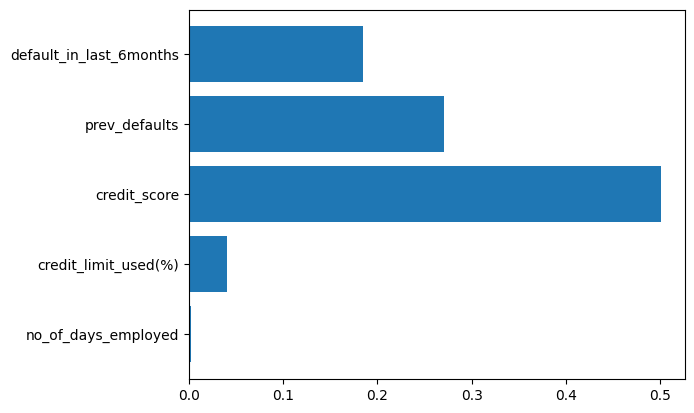

In [ ]:
feature_importances = rnd_clf.feature_importances_
feature_names = prep_pipeline.get_feature_names_out()
plt.barh(feature_names, feature_importances);

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, balanced_accuracy_score
import numpy as np

cv = StratifiedKFold(n_splits=5)

scorer = make_scorer(balanced_accuracy_score)

rf_scores = cross_val_score(rnd_clf, X, y, cv=cv, scoring=scorer)
print(f"Average balanced accuracy for Random Forest model: {np.mean(rf_scores):.4f} (+/- {np.std(rf_scores):.4f})")

Average balanced accuracy for Random Forest model: 0.8799 (+/- 0.0058)


In [ ]:
# overfitting test for random forest
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score

y_train_pred_rf = rnd_clf.predict(X_train)
train_recall_rf = recall_score(y_train, y_train_pred_rf)
train_f1_rf = f1_score(y_train, y_train_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

y_test_pred_rf = rnd_clf.predict(X_test)
test_recall_rf = recall_score(y_test, y_test_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print("Training Metrics:")
print(f"Recall: {train_recall_rf:.4f}")
print(f"F1 Score: {train_f1_rf:.4f}")
print(f"Precision: {train_precision_rf:.4f}")
print(f"Accuracy: {train_accuracy_rf:.4f}")

print("\nTest Metrics:")
print(f"Recall: {test_recall_rf:.4f}")
print(f"F1 Score: {test_f1_rf:.4f}")
print(f"Precision: {test_precision_rf:.4f}")
print(f"Accuracy: {test_accuracy_rf:.4f}")

if train_accuracy_rf > test_accuracy_rf:
    difference = train_accuracy_rf - test_accuracy_rf
    if difference > 0.05:
        print("\nThe Random Forest model might be overfitting.")
    else:
        print("\nThe Random Forest model seems fine, not significantly overfitting.")
else:
    print("\nThe Random Forest model is not overfitting. It performs similarly or better on the test set.")

Training Metrics:
Recall: 0.7618
F1 Score: 0.8648
Precision: 1.0000
Accuracy: 0.9809

Test Metrics:
Recall: 0.7524
F1 Score: 0.8587
Precision: 1.0000
Accuracy: 0.9790

The Random Forest model seems fine, not significantly overfitting.


## Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb_clf = HistGradientBoostingClassifier(max_leaf_nodes=16, max_iter=10, learning_rate=.1) # λ
hgb_clf.fit(X_train, y_train)
print(f'Gradient boosting with {hgb_clf.max_iter} trees leads to accuracy of {hgb_clf.score(X_test, y_test):.4f}.')

hgb_clf.fit(X_train, y_train)

y_pred_hgb = hgb_clf.predict(X_test)

recall_hgb = recall_score(y_test, y_pred_hgb)
f1_hgb = f1_score(y_test, y_pred_hgb)
precision_hgb = precision_score(y_test, y_pred_hgb)

print(f"Recall (Initial HGB): {recall_hgb:.4f}")
print(f"F1 Score (Initial HGB): {f1_hgb:.4f}")
print(f"Precision (Initial HGB): {precision_hgb:.4f}")

Gradient boosting with 10 trees leads to accuracy of 0.9790.
Recall (Initial HGB): 0.7524
F1 Score (Initial HGB): 0.8587
Precision (Initial HGB): 1.0000


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, randint

param_grid = {'max_leaf_nodes': randint(2, 16),
              'max_iter': randint(2, 32),
              'learning_rate': loguniform(1e-2, 1)}

rand_search = RandomizedSearchCV(HistGradientBoostingClassifier(random_state=42),
                                 param_grid, cv=5, n_iter = 50, scoring='accuracy',
                                 random_state=42, refit=True)

rand_search.fit(X_train, y_train)
rand_cv_res = pd.DataFrame(rand_search.cv_results_)
rand_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
rand_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

best_hgb_model = rand_search.best_estimator_

y_pred_best_hgb = best_hgb_model.predict(X_test)

recall_best_hgb = recall_score(y_test, y_pred_best_hgb)
f1_best_hgb = f1_score(y_test, y_pred_best_hgb)
precision_best_hgb = precision_score(y_test, y_pred_best_hgb)

print(f"Recall (Best HGB): {recall_best_hgb:.4f}")
print(f"F1 Score (Best HGB): {f1_best_hgb:.4f}")
print(f"Precision (Best HGB): {precision_best_hgb:.4f}")

test_accuracy_best_hgb = rand_search.score(X_test, y_test)
print(f"Test accuracy (Best HGB): {test_accuracy_best_hgb:.4f}")

Recall (Best HGB): 0.7524
F1 Score (Best HGB): 0.8574
Precision (Best HGB): 0.9964
Test accuracy (Best HGB): 0.9787


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, balanced_accuracy_score
import numpy as np

cv = StratifiedKFold(n_splits=5)

scorer = make_scorer(balanced_accuracy_score)
gb_scores = cross_val_score(rand_search.best_estimator_, X, y, cv=cv, scoring=scorer)
print(f"Average balanced accuracy for Gradient Boosting model: {np.mean(gb_scores):.4f} (+/- {np.std(gb_scores):.4f})")

Average balanced accuracy for Gradient Boosting model: 0.8799 (+/- 0.0058)


In [ ]:
# overfitting test for gradient boosting
from sklearn.metrics import accuracy_score

y_train_pred_best_hgb = best_hgb_model.predict(X_train)

train_recall_best_hgb = recall_score(y_train, y_train_pred_best_hgb)
train_f1_best_hgb = f1_score(y_train, y_train_pred_best_hgb)
train_precision_best_hgb = precision_score(y_train, y_train_pred_best_hgb)
train_accuracy_best_hgb = accuracy_score(y_train, y_train_pred_best_hgb)

print("Training Metrics:")
print(f"Recall: {train_recall_best_hgb:.4f}")
print(f"F1 Score: {train_f1_best_hgb:.4f}")
print(f"Precision: {train_precision_best_hgb:.4f}")
print(f"Accuracy: {train_accuracy_best_hgb:.4f}")

print("\nTest Metrics:")
print(f"Recall: {recall_best_hgb:.4f}")
print(f"F1 Score: {f1_best_hgb:.4f}")
print(f"Precision: {precision_best_hgb:.4f}")
print(f"Accuracy: {test_accuracy_best_hgb:.4f}")

if train_accuracy_best_hgb > test_accuracy_best_hgb:
    difference = train_accuracy_best_hgb - test_accuracy_best_hgb
    if difference > 0.05:
        print("\nThe model might be overfitting.")
    else:
        print("\nThe model seems fine, not significantly overfitting.")
else:
    print("\nThe model is not overfitting. It performs similarly or better on the test set.")

Training Metrics:
Recall: 0.7633
F1 Score: 0.8652
Precision: 0.9986
Accuracy: 0.9809

Test Metrics:
Recall: 0.7524
F1 Score: 0.8574
Precision: 0.9964
Accuracy: 0.9787

The model seems fine, not significantly overfitting.


##XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, f1_score, precision_score

param_distributions = {
    'n_estimators': randint(50, 200),
    'max_leaves': randint(10, 30),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.5, 0.5),
}

rnd_search_xgb = RandomizedSearchCV(
    XGBClassifier(eval_metric='error', objective='binary:logistic', random_state=42),
    param_distributions,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)


rnd_search_xgb.fit(X_train, y_train)

print("Best Parameters:", rnd_search_xgb.best_params_)
print("Best Score:", rnd_search_xgb.best_score_)
print(f"Test accuracy: {rnd_search_xgb.score(X_test, y_test):.4f}")

best_xgb_model = rnd_search_xgb.best_estimator_

y_pred_xgb = best_xgb_model.predict(X_test)

recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)

print(f"Recall (XGBoost): {recall_xgb:.4f}")
print(f"F1 Score (XGBoost): {f1_xgb:.4f}")
print(f"Precision (XGBoost): {precision_xgb:.4f}")

Best Parameters: {'learning_rate': 0.019333132642723086, 'max_leaves': 25, 'n_estimators': 64, 'subsample': 0.728034992108518}
Best Score: 0.9808940862748219
Test accuracy: 0.9790
Recall (XGBoost): 0.7524
F1 Score (XGBoost): 0.8587
Precision (XGBoost): 1.0000


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, balanced_accuracy_score

cv = StratifiedKFold(n_splits=5)

scorer = make_scorer(balanced_accuracy_score)
xgb_scores = cross_val_score(rnd_search_xgb.best_estimator_, X, y, cv=cv, scoring=scorer)
print(f"Average balanced accuracy for XGBoost model: {np.mean(xgb_scores):.4f} (+/- {np.std(xgb_scores):.4f})")

Average balanced accuracy for XGBoost model: 0.8799 (+/- 0.0058)


In [ ]:
# overfitting test for XGBoost
from sklearn.metrics import accuracy_score

y_train_pred_xgb = best_xgb_model.predict(X_train)

train_recall_xgb = recall_score(y_train, y_train_pred_xgb)
train_f1_xgb = f1_score(y_train, y_train_pred_xgb)
train_precision_xgb = precision_score(y_train, y_train_pred_xgb)
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)

print("Training Metrics:")
print(f"Recall: {train_recall_xgb:.4f}")
print(f"F1 Score: {train_f1_xgb:.4f}")
print(f"Precision: {train_precision_xgb:.4f}")
print(f"Accuracy: {train_accuracy_xgb:.4f}")

print("\nTest Metrics:")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Accuracy: {rnd_search_xgb.score(X_test, y_test):.4f}")

if train_accuracy_xgb > rnd_search_xgb.score(X_test, y_test):
    difference = train_accuracy_xgb - rnd_search_xgb.score(X_test, y_test)
    if difference > 0.05:
        print("\nThe model might be overfitting.")
    else:
        print("\nThe model seems fine, not significantly overfitting.")
else:
    print("\nThe model is not overfitting. It performs similarly or better on the test set.")

Training Metrics:
Recall: 0.7618
F1 Score: 0.8648
Precision: 1.0000
Accuracy: 0.9809

Test Metrics:
Recall: 0.7524
F1 Score: 0.8587
Precision: 1.0000
Accuracy: 0.9790

The model seems fine, not significantly overfitting.


## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, balanced_accuracy_score

cv = StratifiedKFold(n_splits=5)

scorer = make_scorer(balanced_accuracy_score)

logistic_scores = cross_val_score(halving_random_search_lg.best_estimator_, X, y, cv=cv, scoring=scorer)
print(f"Average balanced accuracy for Logistic Regression model: {np.mean(logistic_scores):.4f} (+/- {np.std(logistic_scores):.4f})")

rf_scores = cross_val_score(rnd_clf, X, y, cv=cv, scoring=scorer)
print(f"Average balanced accuracy for Random Forest model: {np.mean(rf_scores):.4f} (+/- {np.std(rf_scores):.4f})")

dt_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=cv, scoring=scorer)
print(f"Average balanced accuracy for Decision Tree model: {np.mean(dt_scores):.4f} (+/- {np.std(dt_scores):.4f})")

xgb_scores = cross_val_score(rnd_search_xgb.best_estimator_, X, y, cv=cv, scoring=scorer)
print(f"Average balanced accuracy for XGBoost model: {np.mean(xgb_scores):.4f} (+/- {np.std(xgb_scores):.4f})")

gb_scores = cross_val_score(rand_search.best_estimator_, X, y, cv=cv, scoring=scorer)
print(f"Average balanced accuracy for Gradient Boosting model: {np.mean(gb_scores):.4f} (+/- {np.std(gb_scores):.4f})")

Average balanced accuracy for Logistic Regression model: 0.8886 (+/- 0.0067)
Average balanced accuracy for Random Forest model: 0.8799 (+/- 0.0058)
Average balanced accuracy for Decision Tree model: 0.8800 (+/- 0.0059)
Average balanced accuracy for XGBoost model: 0.8799 (+/- 0.0058)
Average balanced accuracy for Gradient Boosting model: 0.8799 (+/- 0.0058)


# Conclusion

Focusing on recall rate as well as balanced accuracy based on our comprehensive evaluation of our models, Logistic Regression stands out as the most effective model, with 77.27% recall rate and 88.86% average balanced accuracy. It can accurately identify potential defaults, which in default prediction, is a critical advantages. \

While other models like Decision Tree, Random Forest, and XGBoost showed perfect precision and competitive test accuracies, they are considered to be too conservative, leading to higher number of false negaives, which means in actual circumstances, stakeholders may miss out on identifying customers likely to default.

Accordingly, incorporating Logistics Regression model allows financial institutions looking for enhancement of credit risk assessment to achieve accurate and reliable prediction. This improvement in predictive accuracy can potentially lead to better decision-making in credit approvals, risk management, and portfolio management, ultimately contributing to reduced financial risks and losses.

#Challenges

The first significant challenge we encountered was during the feature selection phase. Our initial strategy involved utilizing Lasso Regression as a feature selection method. However, our optimal number of selected features is 16. This outcome indicated that Lasso Regression did not eliminate any variables, contrary to our expectations. Since Lasso model was not aggressive enough in penalizing and eliminating redundant or less significant features. Meanwhile, Lasso assumes a certain level of linearity and relationships between variables, which might not hold true in all parts of our dataset. We eventually give up this feature selection method.

Meanwhile, in our application of feature selection using random forest method, we observed that the optimal feature set was narrowed down to just one feature, which is not quite suitable for model fitting.  However, for Decision Tree and Random Forest models, it was essential to use the Random Forest feature selection method.   To align this with the feature selection approach used in Logistic Regression, we chose to focus on the top five features as identified by the Random Forest method.  Interestingly, this adjusted approach yielded results that were in line with the feature selection outcomes from other methods we employed.

In our initial approach to hyperparameter tuning, we opted for Grid Search, intending to systematically explore a range of hyperparameter combinations for each machine learning method. However, this technique presented significant challenges. Primarily, the computational intensity and time consumption were substantial. Each method required approximately 30 minutes for a single run of Grid Search. Moreover, the results were not always ideal, occasionally leading to errors or suboptimal performance. These issues underscored the impracticality of Grid Search in our context, where efficiency and accuracy are paramount. Therefore, recognizing these limitations, we pivoted to Halving Random Search to handle the complexity of our models without compromising on the quality of the outcomes. Therefore, recognizing these limitations, we pivoted to Halving Random Search to handle the complexity of our models without compromising on the quality of the outcomes.